Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, f1_score, accuracy_score, roc_curve, roc_auc_score,confusion_matrix,classification_report
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

### Q1. Load the dataset 

In [2]:
df=pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
df['name'].nunique()

195

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [4]:
df.groupby('status').count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [6]:
#people with parkinsons have greater representation in the data set
df.shape
#people with healthy status is 48 which is 0
#people with parkinson status is 147 is 1
#data is imbalanced

(195, 24)

In [ ]:
# from df.shape we can see we dont have enough observations for the given 24 columns curse of dimenisonality it is


### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [7]:
df.isnull().sum()
# there is no null values in the dataset
#so no need to drop any columns or replace with it 
#

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

<Figure size 720x1080 with 0 Axes>

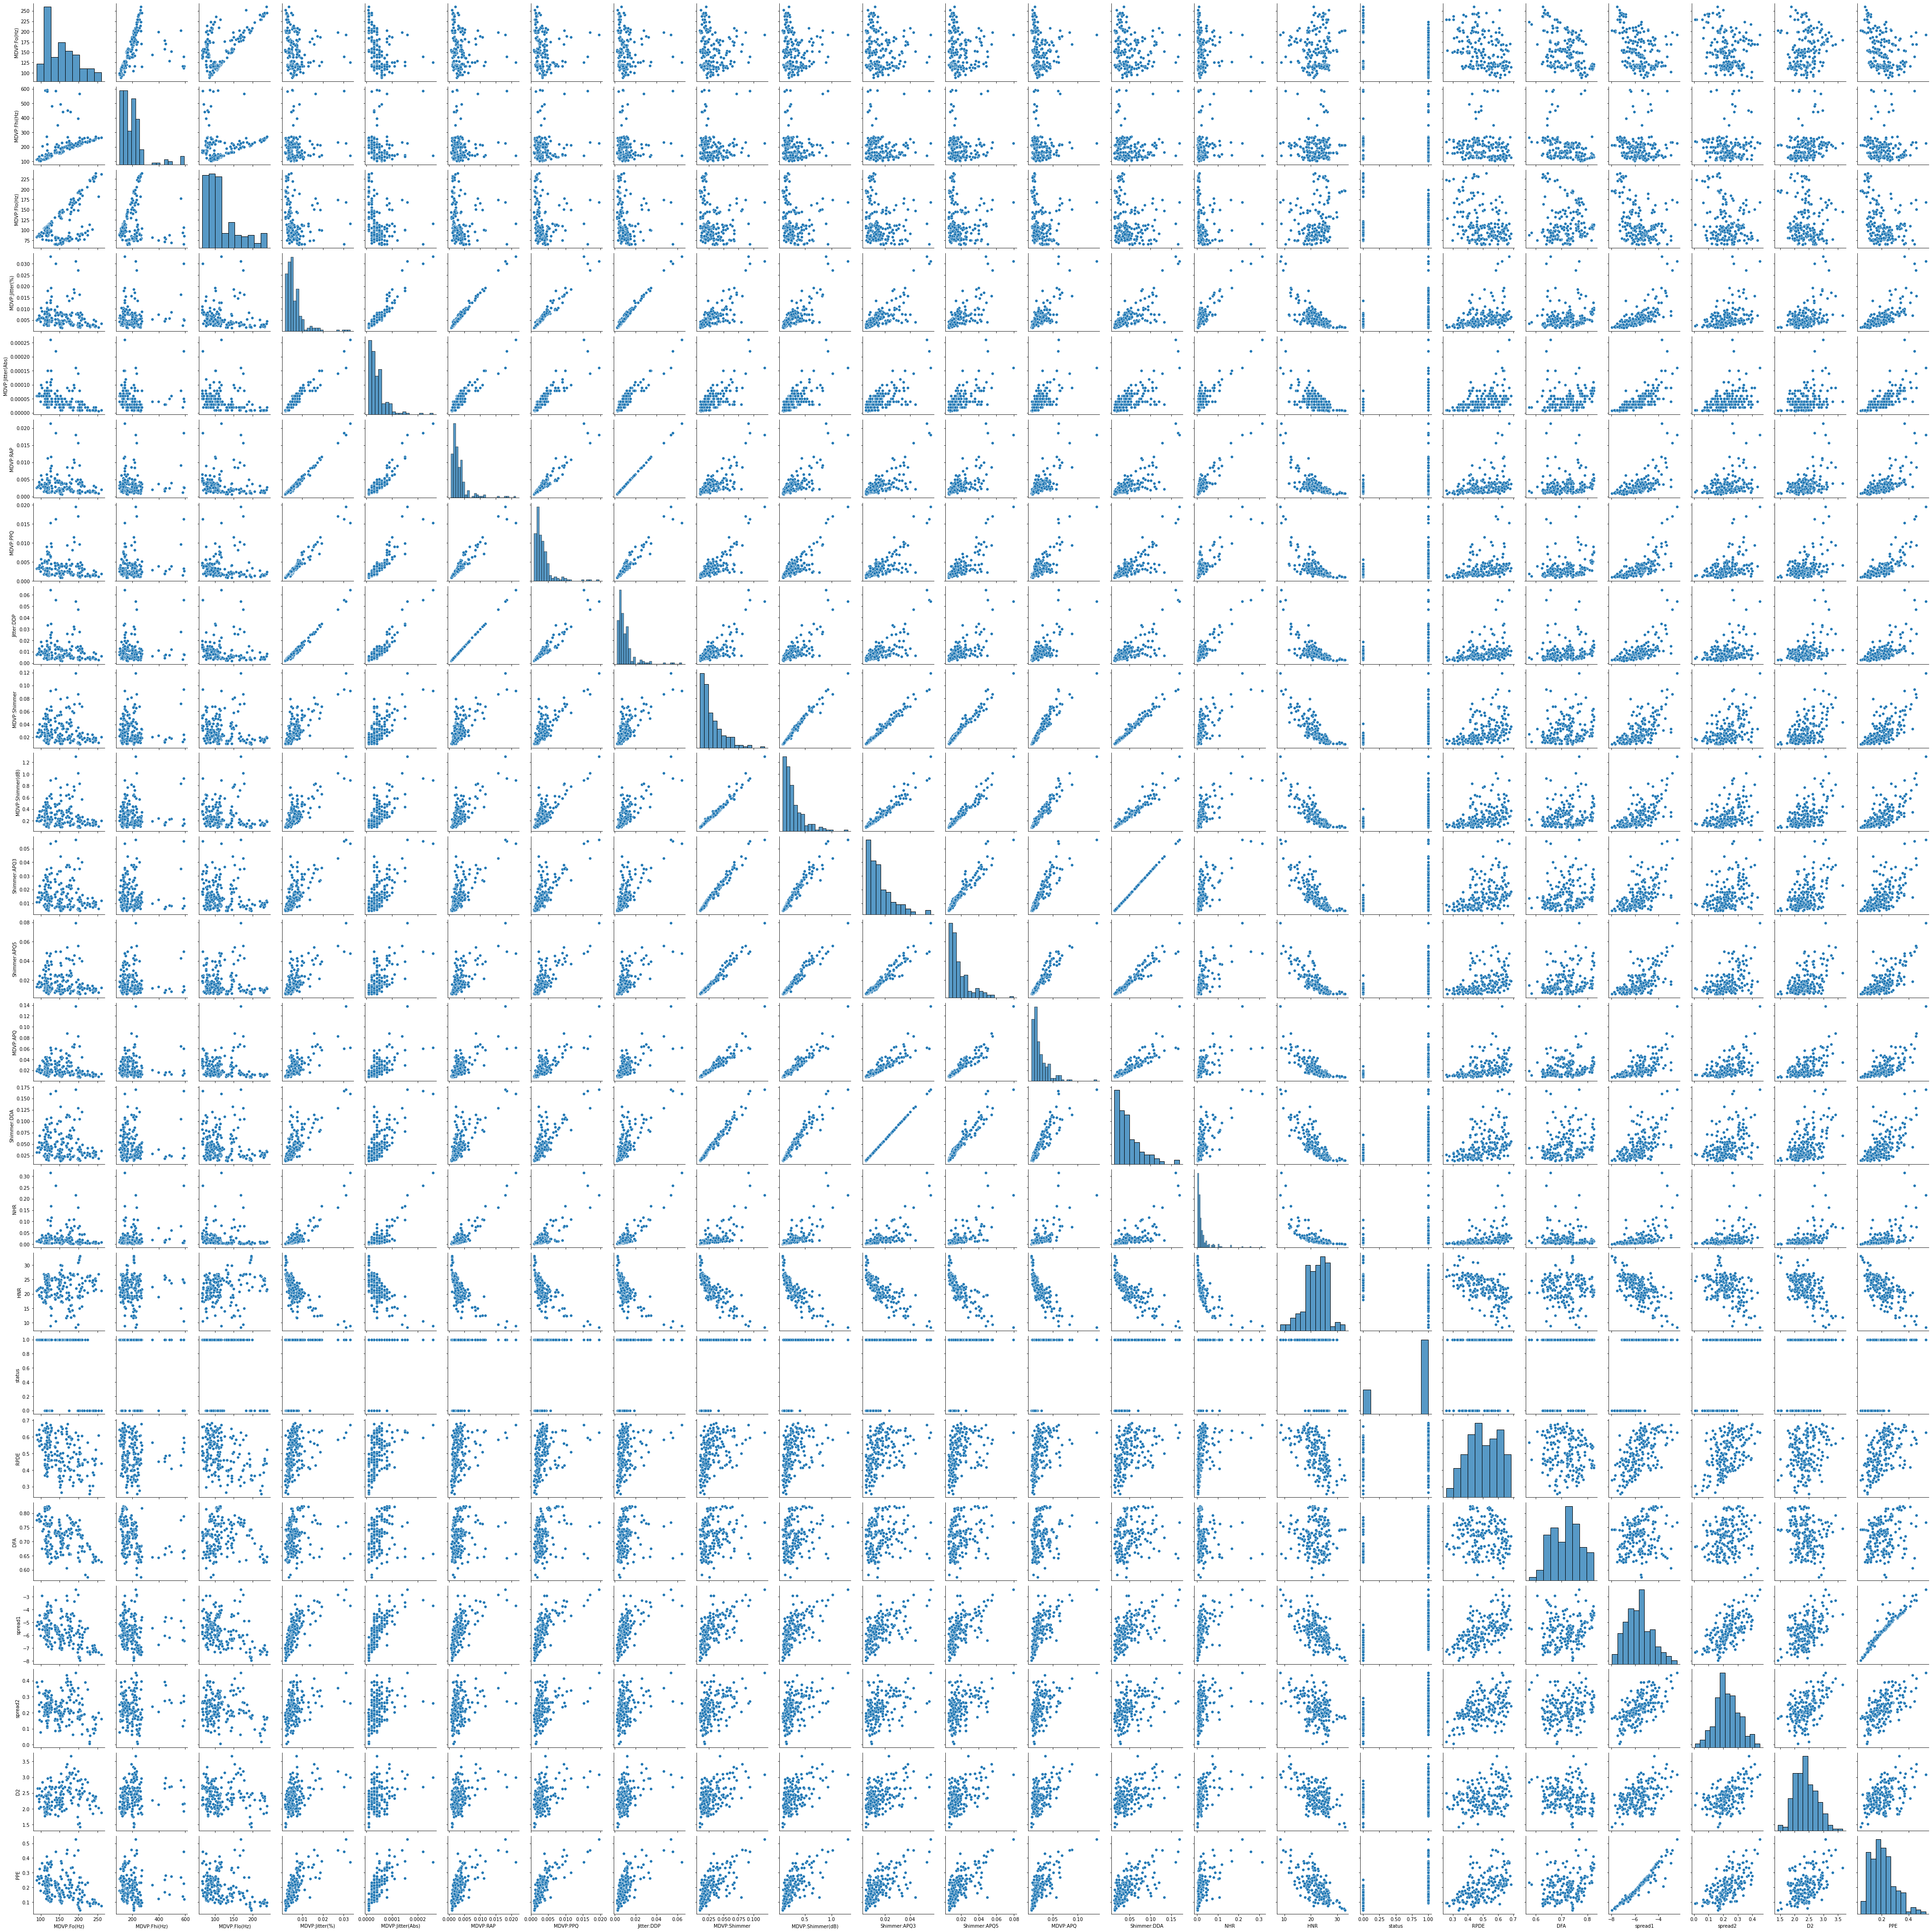

In [11]:
plt.figure(figsize=(10,15))
sns.pairplot(df)

In [ ]:
# As is evident from the scatter matrix, many dimensions have strong correlation 


In [ ]:
#if the scatterplot  between target and indepent variable is cluster which is 
# non linearlly seperatble model if we try to build liner module in it it will suffer from high variance nature

#if the scatterplot is not clusters in nature 
#which is linearly seperable model

In [18]:
df['name'].nunique()

195

In [ ]:
# name column has 195 unique records which is the total observations number which is reduntant in predicting so dropping it

In [16]:
df1=df.drop('name',axis=1)

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

In [19]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [ ]:
#if skewness is high which indicates
#wehave high amount of outliers
#NHR have high amount of oulier with skewness of 4.220709

<AxesSubplot:xlabel='NHR', ylabel='Density'>

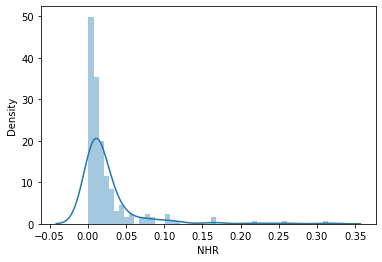

In [26]:
sns.distplot(df['NHR'])

In [ ]:
#displot indicates skwenees from  dis graph 
#we can see that nhr is right skewed so it indicates which have high amount of outliers

In [ ]:
#skewness can be also applied for detecting outliers 
#if skew is more than 0.05 less than - 0.05 which is skwewd which indicates we have outliers


In [24]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=q3-q1
doutliers=df1[((df1 < (Q1 - 1.5 * IQR)) | (df1> (Q3 + 1.5 * IQR))).any(axis=1)]
doutliers.shape

(81, 23)

In [ ]:
# not removing any outliers proceeding further with the given dataset for model building


Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=q3-q1
df2= df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1> (Q3 + 1.5 * IQR))).any(axis=1)]

df2= df2.reset_index(drop=True)

### Q7. Are there any strong correlations among the independent features?

In [32]:
dcor=df1.corr()
dcor

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [39]:
b=dcor[(dcor>0.5)|(dcor<-0.5)].drop('status',axis=1).drop('status',axis=0).columns
b
# these are the columns which have strong correlation between them

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

<AxesSubplot:>

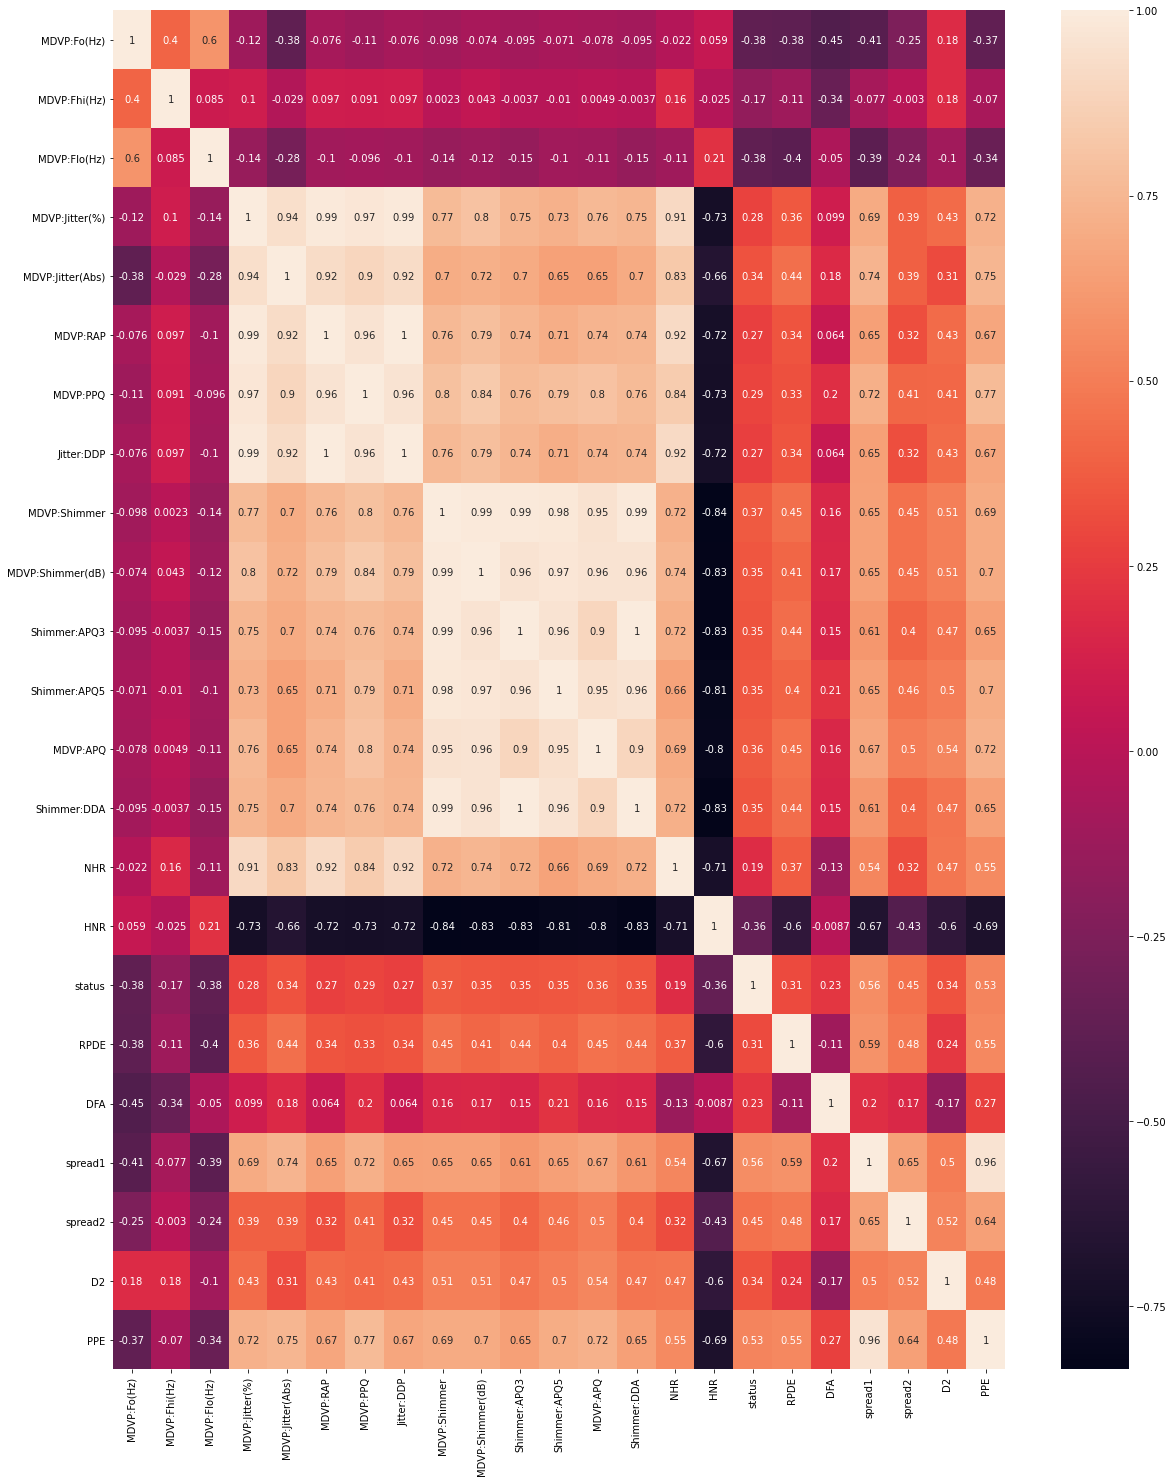

In [31]:
plt.figure(figsize=(20,25))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
#heatmap can be used to tell about correltaion
# if the correlation between two independent features is greater than 0.5 and less than -0.5 it has strong correlation
#yes there is strong correlation between some  independent features 

### Q8. Split dataset into training & test dataset  

In [40]:
x=df1.drop('status',axis=1)
y=df1['status']

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)


### Q9. Create a default decision tree model using criterion = Entropy 

In [49]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=10)
mod1=dt.fit(xtrain,ytrain)
ypred=mod1.predict(xtest)
auc=accuracy_score(ytest,ypred)
auc

0.9743589743589743

In [52]:
kf=KFold(n_splits=3,shuffle=True,random_state=10)
score=cross_val_score(dt,xtrain,ytrain,cv=kf,scoring='roc_auc')
print('Average accuracy : {:.2f}%'.format(np.mean(score)*100))
print('Bias error : {:.2f}%'.format(np.mean(1-score)*100))
print('Variance error : {:.2f}%'.format(np.std(score,ddof=1)*100))

Average accuracy : 80.26%
Bias error : 19.74%
Variance error : 7.69%


### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [ ]:
# selecting random range of values for max_Depth,min_sample_Split

In [ ]:
criterion = ['entropy', 'gini'],
 max_depth = range(2, 10),
 min_samples_split = range(2,10)

In [65]:
# selecting best hyperparametr for the given model usig grid search cb
prms={'criterion' : ['entropy', 'gini'],
 'max_depth':range(2, 20),
 'min_samples_split':range(2,20)}
dt1=DecisionTreeClassifier(random_state=10)
kf=KFold(n_splits=3,random_state=10,shuffle=True)
gd=GridSearchCV(df1,prms,scoring='roc_auc')
gd.fit(xtrain,ytrain)
gd.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 19}

In [63]:
# model building
dt2=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=19,random_state=10)
mod2=df2.fit(xtrain,ytrain)
ypred1=mod2.predict(xtest)
auc=accuracy_score(ypred1,ytest)
auc

0.8974358974358975

In [64]:
kf=KFold(n_splits=3,shuffle=True,random_state=10)
score=cross_val_score(dt2,xtrain,ytrain,cv=kf,scoring='roc_auc')
print('Average accuracy : {:.2f}%'.format(np.mean(score)*100))
print('Bias error : {:.2f}%'.format(np.mean(1-score)*100))
print('Variance error : {:.2f}%'.format(np.std(score,ddof=1)*100))

Average accuracy : 83.74%
Bias error : 16.26%
Variance error : 7.69%


### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [69]:
#basic model
rf=RandomForestClassifier(random_state=10)
mod3=rf.fit(xtrain,ytrain)
ypred3=mod3.predict(xtest)
auc=accuracy_score(ytest,ypred3)
auc

0.9743589743589743

In [70]:
#basic model
kf=KFold(n_splits=3,shuffle=True,random_state=10)
score=cross_val_score(rf,xtrain,ytrain,cv=kf,scoring='roc_auc')
print('Average accuracy : {:.2f}%'.format(np.mean(score)*100))
print('Bias error : {:.2f}%'.format(np.mean(1-score)*100))
print('Variance error : {:.2f}%'.format(np.std(score,ddof=1)*100))

Average accuracy : 92.20%
Bias error : 7.80%
Variance error : 3.57%


In [72]:
rf=RandomForestClassifier(random_state=10)
params={'n_estimators':range(50,300)}
kf=KFold(n_splits=3,random_state=10,shuffle=True)
gd=GridSearchCV(rf,params,cv=kf,scoring='roc_auc')
gd.fit(xtrain,ytrain)
gd.best_params_

{'n_estimators': 269}

In [74]:
rf=RandomForestClassifier(random_state=10)
params={'n_estimators':range(50,400)}
kf=KFold(n_splits=3,random_state=10,shuffle=True)
gd=GridSearchCV(rf,params,cv=kf,scoring='roc_auc')
gd.fit(xtrain,ytrain)
gd.best_params_

{'n_estimators': 269}

In [73]:
rf1=RandomForestClassifier(n_estimators=269,random_state=10)
kf=KFold(n_splits=3,shuffle=True,random_state=10)
score=cross_val_score(rf1,xtrain,ytrain,cv=kf,scoring='roc_auc')
print('Average accuracy : {:.2f}%'.format(np.mean(score)*100))
print('Bias error : {:.2f}%'.format(np.mean(1-score)*100))
print('Variance error : {:.2f}%'.format(np.std(score,ddof=1)*100))

Average accuracy : 93.21%
Bias error : 6.79%
Variance error : 2.31%


In [ ]:
# the optimal number of tree tht gives best result is for the given model is 269 
